In [ ]:
! pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown


In [2]:
filmes = pd.read_csv("desafio_indicium_imdb.csv")
print(f"Dimensão do dataset pré-transformações: {filmes.shape}")

Dimensão do dataset pré-transformações: (999, 16)


#### Transformações iniciais nas colunas

In [3]:
#filmes = pd.read_csv("desafio_indicium_imdb.csv", index_col = False)
filmes = filmes.drop(filmes.columns[0], axis=1) # Retirando a primeira coluna(índices) para melhor visualização
filmes.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Convertendo a coluna 'Released_Year' para inteiro

In [4]:
filmes['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
PG       1
Name: count, Length: 100, dtype: int64

Existe um valor para ano chamado 'PG', que é, provavelmente, um valor errado. Vamos investigar o que fazer.

In [5]:
filmes[filmes['Released_Year']  == 'PG'] # Descobrindo que filme está com a data faltando

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [6]:
filmes.loc[965, 'Released_Year'] = 1995 # Manualmente inserindo a data do filme Apollo 13


In [7]:
filmes['Released_Year'] = filmes['Released_Year'].astype(int)

Vou transformar a coluna 'Runtime' em uma coluna numérica, somente com o valor em minutos da duração do filme.

In [8]:
def separar_runtime(string): 
    minutos, _  = string.split()
    minutos = float(minutos)

    return minutos

filmes['Runtime'] = filmes['Runtime'].apply(separar_runtime)
filmes['Runtime']


0      175.0
1      152.0
2      202.0
3       96.0
4      201.0
       ...  
994    115.0
995    201.0
996    118.0
997     97.0
998     86.0
Name: Runtime, Length: 999, dtype: float64

Transformando a formatação da coluna 'Gross' removendo as virgulas. 

In [9]:
def converter_formatacao(string):
    if string is not np.nan:
        return string.replace(',', '')
    return string

filmes['Gross'] = filmes['Gross'].apply(converter_formatacao).astype('Int64')
filmes['Gross']

0      134966411
1      534858444
2       57300000
3        4360000
4      377845905
         ...    
994         <NA>
995         <NA>
996     30500000
997         <NA>
998         <NA>
Name: Gross, Length: 999, dtype: Int64

Padronizando a coluna 'Certificate' de faixa etária

In [10]:
filmes['Certificate'].value_counts()

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64

A falta de padronização observada se da pelas diferentes maneiras de caracterizar um filme em relação a idade (como podemos ver em: https://en.wikipedia.org/wiki/Central_Board_of_Film_Certification, https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system e https://en-m-wikipedia-org.translate.goog/wiki/TV_Parental_Guidelines?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt&_x_tr_pto=tc) por isso, adotarei um padrão de classificação com algumas categorias pré-definidas: 

In [11]:
mapeamento_classificacao = {
    'U': 'Livre',
    'G': 'Livre',
    'Passed': 'Livre',
    'Approved': 'Livre',
    'PG': 'Orientacao parental recomendada',
    'UA': 'Orientacao parental recomendada',
    'PG-13': 'Orientacao parental recomendada',
    'R': 'Adulto',
    'A': 'Adulto',
    'TV-MA': 'Adulto',
    '16': 'Adulto',
    'TV-14': 'Orientacao parental recomendada',
    'GP': 'Livre',
    'Unrated': 'Nao classificado',
}


In [12]:
filmes['Certificate'] = filmes["Certificate"].map(mapeamento_classificacao)
filmes['Certificate'] = filmes["Certificate"].fillna("Nao classificado")
filmes['Certificate']

0                               Adulto
1      Orientacao parental recomendada
2                               Adulto
3                                Livre
4                                Livre
                    ...               
994                             Adulto
995                              Livre
996                              Livre
997                   Nao classificado
998                   Nao classificado
Name: Certificate, Length: 999, dtype: object

#### Visão geral do data-set

Informações gerais sobre as colunas.

In [13]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    Int64  
dtypes: Int64(1), float64(3), int64(2), object(9)
memory usage: 118.2+ KB


In [14]:
display(Markdown("### Variáveis qualitativas"))
print(filmes.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(filmes.describe())

### Variáveis qualitativas

       Series_Title Certificate  Genre  \
count           999         999    999   
unique          998           4    202   
top        Drishyam      Adulto  Drama   
freq              2         344     84   

                                                 Overview          Director  \
count                                                 999               999   
unique                                                999               548   
top     An organized crime dynasty's aging patriarch t...  Alfred Hitchcock   
freq                                                    1                14   

            Star1        Star2         Star3          Star4  
count         999          999           999            999  
unique        659          840           890            938  
top     Tom Hanks  Emma Watson  Rupert Grint  Michael Caine  
freq           12            7             5              4  


### Variáveis quantitativas

       Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  999.000000   999.000000  842.000000  9.990000e+02   
mean     1991.218218  122.871872     7.947948   77.969121  2.716214e+05   
std        23.297166   28.101227     0.272290   12.383257  3.209126e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   70.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   79.000000  1.383560e+05   
75%      2009.000000  137.000000     8.100000   87.000000  3.731675e+05   
max      2020.000000  321.000000     9.200000  100.000000  2.303232e+06   

                  Gross  
count             830.0  
mean    68082574.104819  
std    109807553.385723  
min              1305.0  
25%           3245338.5  
50%          23457439.5  
75%         80876340.25  
max         936662225.0  


#### Análise univariada

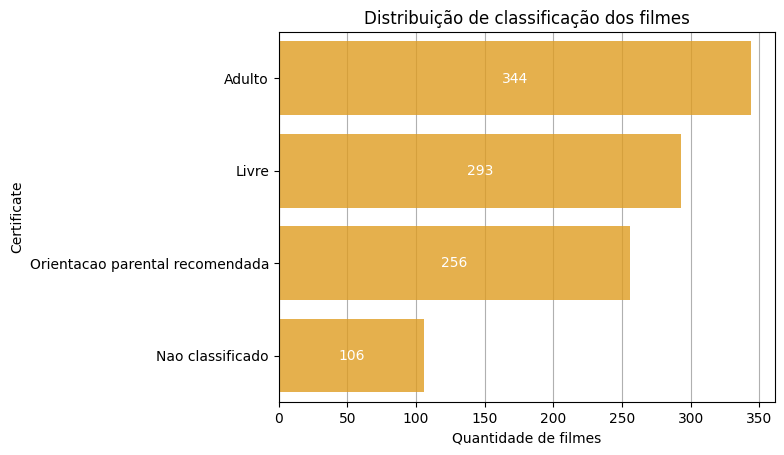

In [28]:
ordem = filmes['Certificate'].value_counts().index
ax = sns.countplot(data = filmes, y = 'Certificate', order = ordem, alpha = 0.8, color='orange')
ax.bar_label(ax.containers[0], color="white", label_type="center")
ax.set_axisbelow(True)
ax.set(title="Distribuição de classificação dos filmes", xlabel="Quantidade de filmes",)
plt.grid(axis='x')
plt.show()

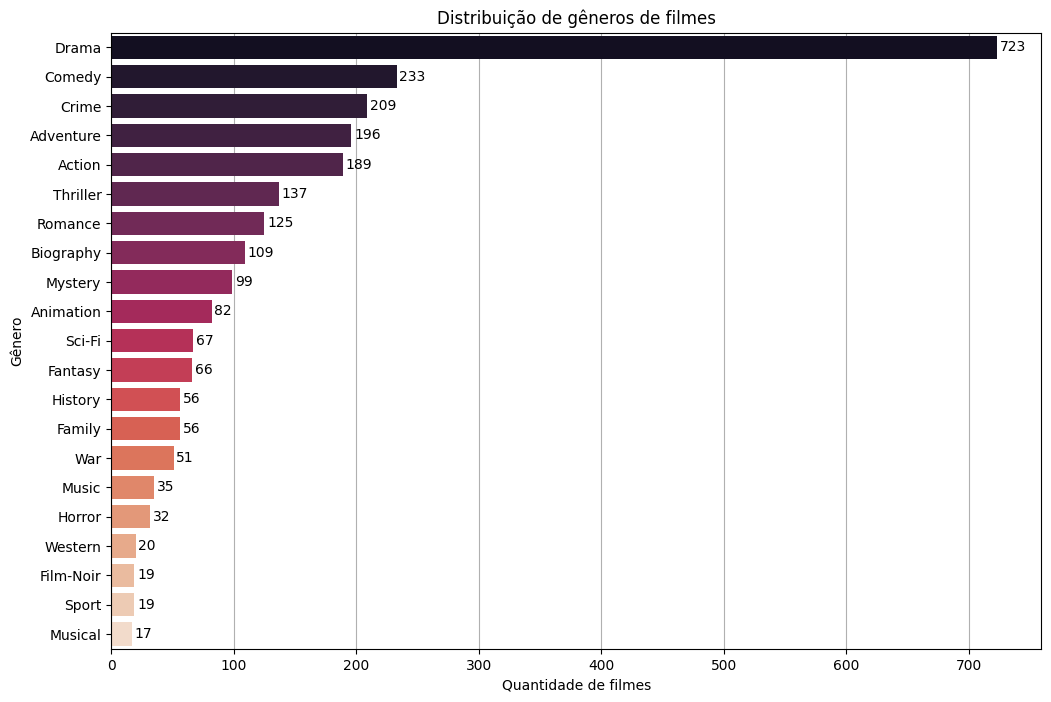

In [70]:
generos_filme = filmes['Genre'].str.split(', ').explode().value_counts() # Contagem dos generos de cada filme separados por virgula 
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=generos_filme.values, y=generos_filme.index, palette='rocket', hue=generos_filme.index, legend=False)
for container in ax.containers:
    ax.bar_label(container, color="black", padding=2)
ax.set_axisbelow(True)
ax.set(title="Distribuição de gêneros de filmes", xlabel="Quantidade de filmes", ylabel='Gênero')

plt.grid(axis='x')
plt.show()


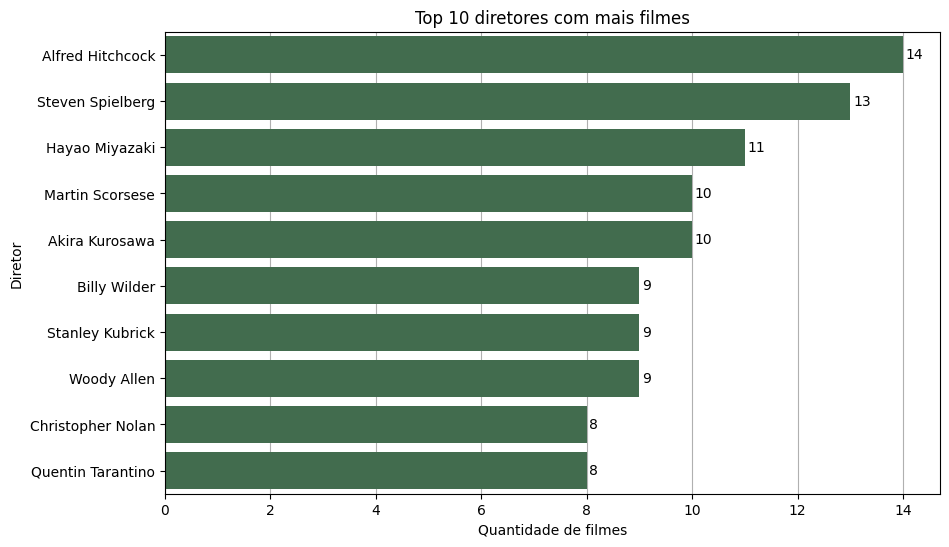

In [89]:
# top10 directors
top10_diretores = filmes['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top10_diretores.values, y=top10_diretores.index, color="#3B734B")
for container in ax.containers:
    ax.bar_label(container, color="black", padding=2)
ax.set_axisbelow(True)
ax.set(title="Top 10 diretores com mais filmes", xlabel="Quantidade de filmes", ylabel='Diretor')

plt.grid(axis='x')
plt.show()

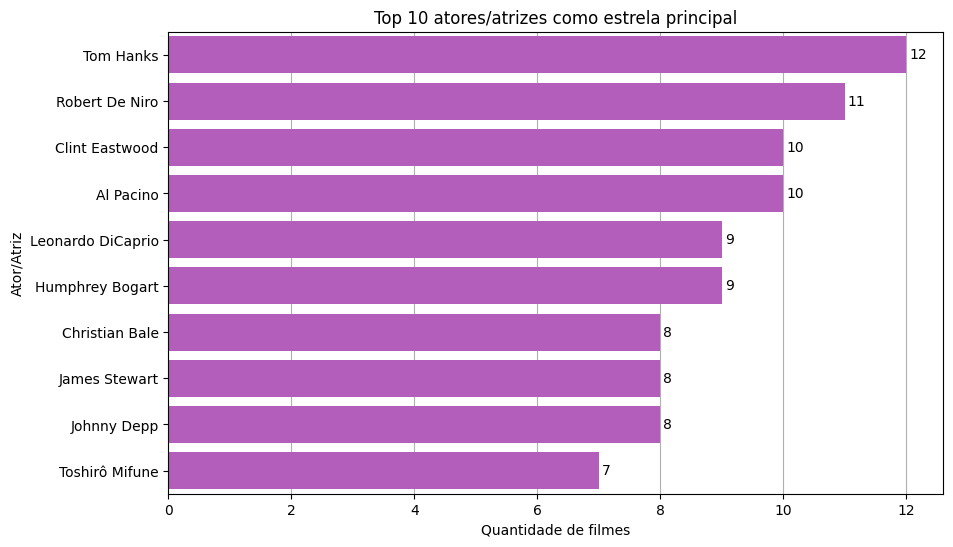

In [88]:
# top10 1st stars 
top10_diretores = filmes['Star1'].value_counts().head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top10_diretores.values, y=top10_diretores.index, color="#C04ECA")
for container in ax.containers:
    ax.bar_label(container, color="black", padding=2)
ax.set_axisbelow(True)
ax.set(title="Top 10 atores/atrizes como estrela principal", xlabel="Quantidade de filmes", ylabel='Ator/Atriz')

plt.grid(axis='x')
plt.show()

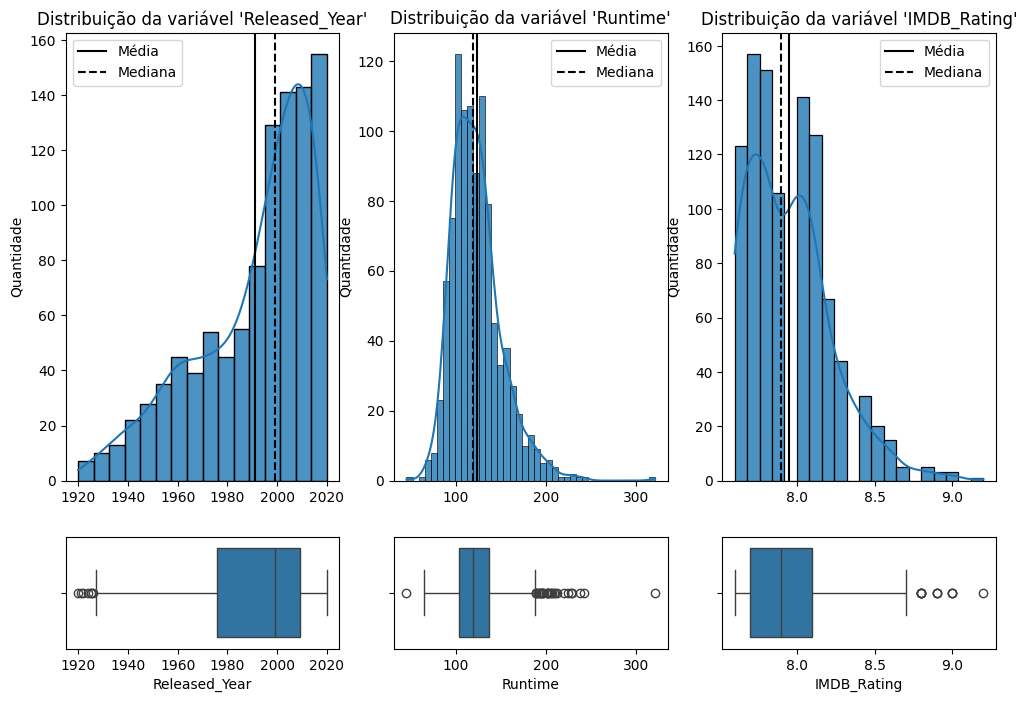

In [ ]:
variaveis_quantitativas1 = ['Released_Year', 'Runtime', 'IMDB_Rating']
variaveis_quantitativas2 = ['Meta_score', 'No_of_Votes', 'Gross']

fig, axes = plt.subplots(figsize=(12,8), ncols=3, nrows=2, gridspec_kw={"height_ratios": [4, 1]})

for i, variavel in enumerate(variaveis_quantitativas1):
    ax1 = sns.histplot(data=filmes, x=variavel, ax=axes[0, i], alpha=0.8, kde=True)
    ax1.axvline(filmes[variavel].mean(), color='black', label="Média")
    ax1.axvline(filmes[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax1.set(title=f"Distribuição da variável '{variavel}'", ylabel="Quantidade", xlabel='')
    ax1.legend()


    ax2 = sns.boxplot(data=filmes, x=variavel, ax=axes[1, i])



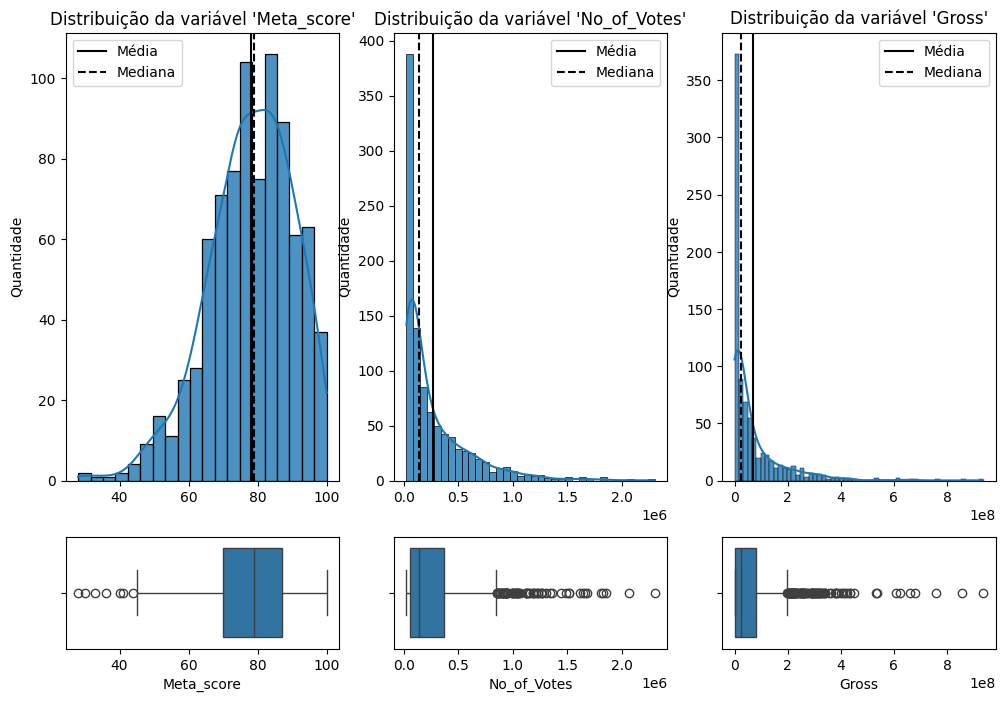

In [101]:
fig, axes = plt.subplots(figsize=(12,8), ncols=3, nrows=2, gridspec_kw={"height_ratios": [4, 1]})

for i, variavel in enumerate(variaveis_quantitativas2):
    ax1 = sns.histplot(data=filmes, x=variavel, ax=axes[0, i], alpha=0.8, kde=True)
    ax1.axvline(filmes[variavel].mean(), color='black', label="Média")
    ax1.axvline(filmes[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax1.set(title=f"Distribuição da variável '{variavel}'", ylabel='Quantidade', xlabel='')
    ax1.legend()


    ax2 = sns.boxplot(data=filmes, x=variavel, ax=axes[1, i])

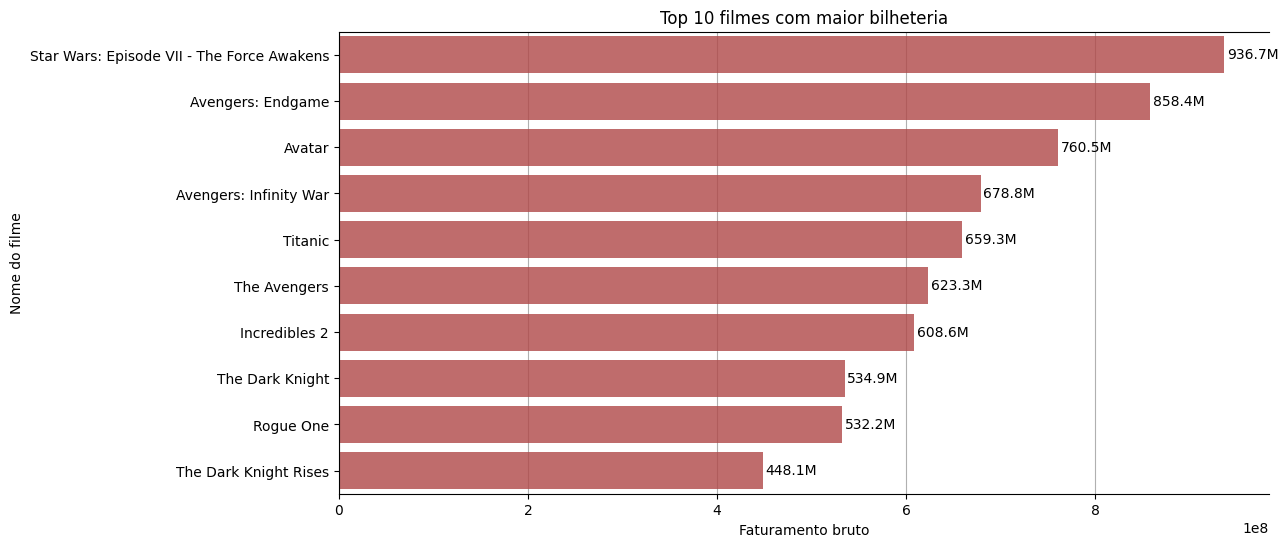

In [143]:
top10_gross = filmes.sort_values(by='Gross', ascending=False).head(10)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=top10_gross['Gross'], y=top10_gross['Series_Title'], color="#C13535BA", alpha = 0.8)

ax.set_axisbelow(True)
ax.set(title="Top 10 filmes com maior bilheteria", xlabel="Faturamento bruto", ylabel="Nome do filme")

labels = top10_gross['Gross'] / 1_000_000
labels = labels.map(lambda x:f'{x:.1f}M')

ax.bar_label(ax.containers[0], color = 'black', labels=labels,padding= 2, fmt='%d')
ax.spines['right'].set_visible(False)
plt.grid(axis='x')
plt.show()

#### Análise bivariada

In [ ]:
# matriz de correlacao

#### Análise multivariada

In [ ]:
# Released_Year Certificate* Runtime Genre* Meta_score No_of_Votes Gross -> IMDB rating

In [ ]:
# ?

#### Tratamentos

Vamos modelar a coluna 'Genre' de modo que cada gênero único recebe uma coluna própria com um valor booleano, ou seja, se o filme A têm generos 'Drama, Romance', nas colunas 'Drama' e 'Romance' teria valor True(ou 1) e nas demais valor False(ou 0).

In [ ]:
#generos_unicos = filmes['Genre'].str.get_dummies(sep=', ')
#filmes = pd.concat([filmes.drop('Genre', axis=1), generos_unicos], axis=1)
#filmes.head()
